In [24]:
!pip install kaggle

In [25]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [26]:
!kaggle competitions download -c cifar-10

cifar-10.zip: Skipping, found more recently modified local copy (use --force to force download)


In [27]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [28]:
from zipfile import ZipFile   # extracting the compressed  dataset
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [29]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [30]:
!pip install py7zr

In [31]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()     #archive.extractall(path='/content/Training Data')
archive.close()

In [32]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [33]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [34]:
filenames = os.listdir('/content/train')

In [35]:
type(filenames)

list

In [36]:
len(filenames)

50000

In [37]:
print(filenames[:5])
print(filenames[-5:])

['17563.png', '8982.png', '762.png', '45660.png', '38308.png']
['44303.png', '39468.png', '46193.png', '47183.png', '48250.png']


Labels **processsing**

In [38]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [39]:
labels_df.shape

(50000, 2)

In [40]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [41]:
labels_df.tail()

,id,label
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [42]:
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [43]:
labels_dict = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels =[labels_dict[i] for i in labels_df['label']]
print(labels[:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


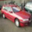

In [44]:
#DISPLAYING SAMPLE IMAGE
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/train/23221.png')
cv2_imshow(img)

In [45]:
id_list = list(labels_df['id'])
print(id_list[:5])

[1, 2, 3, 4, 5]


Image Processingss


In [46]:
#convert iamges to numpy arrays

train_data_folder = '/content/train/'
data = []
for id in id_list:
  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [47]:
type(data[0])

numpy.ndarray

In [48]:
data[0].shape

(32, 32, 3)

In [49]:
data[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [50]:
from re import X
#convert images list and labels list to numpy array

X = np.array(data)
Y = np.array(labels)

In [51]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


Train Test Split (Some data as training and some data as testing)

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [53]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [54]:
# scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [55]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

Building neural network

In [56]:
import tensorflow as tf
from tensorflow import keras

In [57]:
no_of_classes = 10

#setting the layers of Neural Network
model = keras.Sequential([

    keras.layers.Flatten(input_shape=(32,32,3)),        #input layer #flatten to 1d
    keras.layers.Dense(64, activation='relu'),           #hidden layer #64=power of 2 is efficient
    keras.layers.Dense(no_of_classes, activation='softmax')     #output layer
])

In [58]:
#compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [59]:
#training the neural network
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs =10)

Epoch 1/10
1125/1125 [==============================] - 9s 3ms/step - loss: 2.1197 - acc: 0.1997 - val_loss: 1.9317 - val_acc: 0.2735
Epoch 2/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.9022 - acc: 0.2942 - val_loss: 1.8641 - val_acc: 0.3022
Epoch 3/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8635 - acc: 0.3182 - val_loss: 1.8467 - val_acc: 0.3235
Epoch 4/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8448 - acc: 0.3272 - val_loss: 1.8150 - val_acc: 0.3327
Epoch 5/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8371 - acc: 0.3316 - val_loss: 1.8095 - val_acc: 0.3445
Epoch 6/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8268 - acc: 0.3351 - val_loss: 1.7951 - val_acc: 0.3420
Epoch 7/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8092 - acc: 0.3423 - val_loss: 1.8182 - val_acc: 0.3360
Epoch 8/10
1125/1125 [==============================] - 3s 3ms

ResNet50 : Transfer learning

In [60]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [61]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [62]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [63]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()